# Convolutional Neural Networks
The spatial relation of images: two-dimensional grid of pixels matters. So far we igmore the structure and flatten images as vectors, which is necessary to feed it into a fully connected MLP. we would leverage our prior knowledge that nearby pixels are typically related to each other, to build efficient models for learning from image data.   
This chapter introduces **convolutional neural networks** (CNNs) (LeCun et al., 1995), a powerful family of neural networks that are designed for precisely this purpose. 

## 7.1. From Fully Connected Layers to Convolutions
For high-dimensional perceptual data, MLP is a structureless network and can grow unwieldy.  
Images exhibit rich structure that can be exploited by humans and machine learning models alike. **Convolutional neural networks** (CNNs) are one creative way that machine learning has embraced for exploiting some of the known structure in natural images.
### 7.1.1. Invariance
CNNs systematize the idea of spatial invariance: what it looks like does not depend upon where it is located., exploiting it to learn useful representations with fewer parameters.  
- **translation invariance** (translation equivariance): network should respond similarly to the same patch, regardless of where it appears in the image. 
- **locality** principle: The earliest layers of the network should focus on local regions, without regard for the contents of the image in distant regions. Eventually, these local representations can be aggregated to make predictions at the whole image level.
- As we proceed, deeper layers should be able to capture longer-range features of the image, in a way similar to higher level vision in nature.


### 7.1.2. Constraining the MLP
Consider an MLP with:
- input: 2d images $\mathbf X$
- immediate hidden representations: matrices $\mathbf H$
- not only the inputs but also the hidden representations possess spatial structure.
- $[\mathbf{X}]_{i, j}$ and $[\mathbf{H}]_{i, j}$ denote the pixel at $(i,j)$ in input & hidden representation.

Switch from using weight matrices to fourth-order weight tensors $\mathsf{W}$. With $\mathsf{U}$ contains biases, the fully connected layer is: 
$$
\begin{split}\begin{aligned} \left[\mathbf{H}\right]_{i, j} &= [\mathbf{U}]_{i, j} + \sum_k \sum_l[\mathsf{W}]_{i, j, k, l}  [\mathbf{X}]_{k, l}\\ &=  [\mathbf{U}]_{i, j} +
\sum_a \sum_b [\mathsf{V}]_{i, j, a, b}  [\mathbf{X}]_{i+a, j+b}.\end{aligned}\end{split}
$$
Switch from $\mathsf{W}$  to $\mathsf{V}$: set $[\mathsf{V}]_{i, j, a, b} = [\mathsf{W}]_{i, j, i+a, j+b}$  
For any given location ($i$,$j$) in $[\mathbf{H}]_{i, j}$, its value is sum over pixels in $x$, centered around ($i$,$j$) and weighted by $[\mathsf{V}]_{i, j, a, b}$. The number of parameters for a single layer is 1000*1000  image mapped to 1000*1000 hidden representation, which is too large.
#### 7.1.2.1. Translation Invariance
A shift in the input $\mathbf X$ should lead to a shift in the hidden representation $\mathbf H$, which is only possible if  $\mathsf V$ and $\mathsf U$ don't depend on ($i$,$j$).  
The definition of $\mathbf H$ can be simplified as: $[\mathbf{H}]_{i, j} = u + \sum_a\sum_b [\mathbf{V}]_{a, b}  [\mathbf{X}]_{i+a, j+b}.$ , $[\mathsf{V}]_{i, j, a, b} = [\mathbf{V}]_{a, b}$ and $\mathbf U$ is a constant $u$, which is a **convolution**.  
Weight pixels to obtain the value. Number of parameters required is 4*10^6.  
Time-delay neural networks (TDNNs) are some of the first examples to exploit this idea 
#### 7.1.2.2. Locality
we believe that we should not have to look very far away from location to gain relevant information we want. Outside sime range $|a|> \Delta$ or $|b|> \Delta$, we should set $[\mathbf{V}]_{a, b} = 0$. So we rewrite $[\mathbf{H}]_{i, j}$ as: $[\mathbf{H}]_{i, j} = u + \sum_{a = -\Delta}^{\Delta} \sum_{b = -\Delta}^{\Delta} [\mathbf{V}]_{a, b}  [\mathbf{X}]_{i+a, j+b}$ -- a **convolutional layer**. Number of parameters required is $4 \Delta^2$.   
**Convolutional neural networks (CNNs)** are neural networks that contain convolutional layers. $\mathbf{V}$ is a **convolution kernel / filter**, or the **weights** that are learnable parameters.  
The price paid for the reduction in parameters is:
- our features are now translation invariant and that our layer can only incorporate local information
- All learning depends on imposing inductive bias. When that bias agrees with reality, we get sample-efficient models that generalize well to unseen data. If not, the model might struggle to fit.

### 7.1.3. Convolutions
The **convolution** between two functions is defined as: $(f * g)(\mathbf{x}) = \int f(\mathbf{z}) g(\mathbf{x}-\mathbf{z}) d\mathbf{z}.$  
For vectors from the set of square-summable infinite-dimensional vectors: $(f * g)(i) = \sum_a f(a) g(i-a).$  
For two-dimensional tensors: $(f * g)(i, j) = \sum_a\sum_b f(a, b) g(i-a, j-b).$ --> using difference. the **cross-correlation** use $(i+a, j+b)$

### 7.1.4. Channels
The convolutional layer picks windows of a given size and weighs intensities according to the filter $\mathsf{V}$  
Images consist of 3 channels and are third-order tensors with height, width and channel. 
- Input $\mathsf{X}$ is a third-order tensor $[\mathsf{X}]_{i, j, k}$
- filter is $[\mathsf{V}]_{a,b,c}$. 
- Hidden representation is a third-order tensor $[\mathsf{H}]_{i, j, k}$ $\mathsf H$ 
- The convolution kernel must connect input to output, each output channel has its own 3d filter. So the kernel now have the shape: $[\mathsf{V}]_{a, b, c, d}$

Add above all we have: $[\mathsf{H}]_{i,j,d} = \sum_{a = -\Delta}^{\Delta} \sum_{b = -\Delta}^{\Delta} \sum_c [\mathsf{V}]_{a, b, c, d} [\mathsf{X}]_{i+a, j+b, c},$  
where $d$ indexes the output channels in the hidden representation $\mathsf{X}$ 

### 7.1.5. Summary and Discussion
- derived the structure of convolutional neural networks from first principles.
- how to reduce the number of parameters in a function class without limiting its expressive power, at least, whenever certain assumptions on the model hold. 
- Adding channels allowed us to bring back some of the complexity that was lost due to the restrictions imposed on the convolutional kernel by locality and translation invariance.


## 7.2. Convolutions for Images
### 7.2.1. The Cross-Correlation Operation
'Convolutional layers' are actually cross-correlations. An input tensor and a kernel tensor are combined to produce an output tensor through a cross-correlation operation.  
Example: 
- ignore channels, 2d data
- input: 2d tensor, height = width = 3 --> $n_\textrm{h} \times n_\textrm{w}$
- kernel: height = width = 2 --> $k_\textrm{h} \times k_\textrm{w}$
- **kernel window / convolution window** is the shape of the kernel (2*2)
- output: size is given by the input size - convolution kernel size --> $(n_\textrm{h}-k_\textrm{h}+1) \times (n_\textrm{w}-k_\textrm{w}+1).$

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
# implement the cross-correlation operation.
def corr2d(X, K):  #@save
    """Compute 2D cross-correlation."""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [4]:
# example
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

### 7.2.2. Convolutional Layers
A convolutional layer cross-correlates the input and kernel and adds a scalar bias to produce an output.  
Parameters: kernel, scalar bias.  
For a convolutional layer with $h \times w$ convolution kernel, it is refered as $h \times w$ convolutional layer

In [5]:
# implement a 2d convolutional layer
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

### 7.2.3. Object Edge Detection in Images

In [6]:
# construct an image with 6*8 pixels
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [7]:
# construct a kernel with height=1 and width=2
# if horizontal adjacent are the same, output 0, else nonzero.
# the kernel is a special case of a finite difference oerpator.
K = torch.tensor([[1.0, -1.0]])

# apply the kernel
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

### 7.2.4. Learning a Kernel
How to learn the kernel that generated Y from X by looking at the input-output pairs only. --> recover the kernel by X,Y  
- construct a convolutional layer, initialize kernel as a random tensor
- compare Y with the output of the convolutional layer using squared error in each iteration
- calculate the grad to update the kernel

In [8]:
# Construct a two-dimensional convolutional layer with 1 output channel and a
# kernel of shape (1, 2). For the sake of simplicity, we ignore the bias here
conv2d = nn.LazyConv2d(1, kernel_size=(1, 2), bias=False)

# The two-dimensional convolutional layer uses four-dimensional input and
# output in the format of (example, channel, height, width), where the batch
# size (number of examples in the batch) and the number of channels are both 1
X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
lr = 3e-2  # Learning rate

for i in range(10):
    Y_hat = conv2d(X)
    l = (Y_hat - Y) ** 2
    conv2d.zero_grad()
    l.sum().backward()
    # Update the kernel
    conv2d.weight.data[:] -= lr * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'epoch {i + 1}, loss {l.sum():.3f}')

epoch 2, loss 7.752
epoch 4, loss 1.893
epoch 6, loss 0.560
epoch 8, loss 0.193
epoch 10, loss 0.073


In [10]:
# the kernel learned by X,Y
conv2d.weight.data.reshape((1, 2))

tensor([[ 1.0152, -0.9609]])

### 7.2.5. Cross-Correlation and Convolution
Convolution: flipped kernel + sliding dot product, using minus.  
Cross-correlation: sliding dot product (no flip), using plus.  
To get the output of strict convolution operation, flitp the 2d kernel both horizontally and vertically, and perform the cross-correlation operation.  
The outputs of convolutional layers remain unaffected no matter such layers perform either the convolution operations or the cross-correlation operations.  
**Element**: an entry (or component) of any tensor representing a layer representation or a convolution kernel.

### 7.2.6. Feature Map and Receptive Field
The convolutional layer output is sometimes called a **feature map**. It can be regarded as the learned representations (features) in the spatial dimensions (e.g., width and height) to the subsequent layer.  
**Receptive field**: all elements from all the previous layers that may affect the calculation of $x$ during the forward propagation. May larger than the actual size of the input. When any element in a feature map needs a larger receptive field to detect input features over a broader area, we can build a deeper network.  
### 7.2.7. Summary
- The core computation required for a convolutional layer is a cross-correlation operation. A simple for-loop is all that is required to compute its value.
- For multiple input and multiple output channels, use matrix-matrix operation between channels.
- The computation is straightforward and **local**, affords significant hardware optimization. Designers can invest in fast computation rather than memory when it comes to optimizing for convolutions
- convolutions can be used for detecting edges and lines, blurring images, or sharpening them. 
- we can learn the filters from data. 

## 7.3. Padding and Stride
With input $n_\textrm{h}\times n_\textrm{w}$ and kernel $k_\textrm{h}\times k_\textrm{w}$, the output shape will be: $(n_\textrm{h}-k_\textrm{h}+1) \times (n_\textrm{w}-k_\textrm{w}+1)$.  
To control the size of the output, we use padding and stride. 

### 7.3.1. Padding
Convolutional layers tend to lose pixels on the perimeter of the image.  
Solution: add extra pixels (value = 0) of filler around the boundary of input.  
After add $p_\textrm{h}$ rows of padding and $p_\textrm{w}$ columns of padding, the output shape is: $(n_\textrm{h}-k_\textrm{h}+p_\textrm{h}+1)\times(n_\textrm{w}-k_\textrm{w}+p_\textrm{w}+1).$ (increase $p_\textrm{h}$ and $p_\textrm{w}$ on height & width).  
Usually set $p_\textrm{h}=k_\textrm{h}-1, p_\textrm{w}=k_\textrm{w}-1$ to give the input & output same height & width. If $k_\textrm{h}$ is odd, pad $p_\textrm{h}/2$ on both sides, if is even, pad $\lceil p_\textrm{h}/2\rceil$ on top and $\lfloor p_\textrm{h}/2\rfloor$ on bottom.  
CNNs usually use kernels with odd height & width (1, 3, 5, 7) to padding the same number of rows & columns on both sides. And each output pixel is computed from a window that is centered on the input pixel. 

In [11]:
import torch
from torch import nn

In [12]:
# a 2d convolutional layer with height = width = 3 and 1 padding on all sides
# input: height = width = 8, output: height = width = 8

# We define a helper function to calculate convolutions. It initializes the
# convolutional layer weights and performs corresponding dimensionality
# elevations and reductions on the input and output
def comp_conv2d(conv2d, X):
    # (1, 1) indicates that batch size and the number of channels are both 1
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    # Strip the first two dimensions: examples and channels
    return Y.reshape(Y.shape[2:])

# 1 row and column is padded on either side, so a total of 2 rows or columns
# are added
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [13]:
# set diff padding and diff kernel shape with the same output shape

# We use a convolution kernel with height 5 and width 3. The padding on either
# side of the height and width are 2 and 1, respectively
conv2d = nn.LazyConv2d(1, kernel_size=(5, 3), padding=(2, 1))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

### 7.3.2. Stride
Move our window more than one element at a time, skipping the intermediate locations. Useful when the kernel is large.  
**Stride**: # rows & columns traversed per slide.  
When stride for height & width are: $s_\textrm{h}, s_\textrm{w}$, the output shape is: $\lfloor(n_\textrm{h}-k_\textrm{h}+p_\textrm{h}+s_\textrm{h})/s_\textrm{h}\rfloor \times \lfloor(n_\textrm{w}-k_\textrm{w}+p_\textrm{w}+s_\textrm{w})/s_\textrm{w}\rfloor.$  
Set $p_\textrm{h}=k_\textrm{h}-1, p_\textrm{w}=k_\textrm{w}-1$ then output shape is simplified to: $\lfloor(n_\textrm{h}+s_\textrm{h}-1)/s_\textrm{h}\rfloor \times \lfloor(n_\textrm{w}+s_\textrm{w}-1)/s_\textrm{w}\rfloor$  
If the input height & width are divisible by the strides, the output shape is $(n_\textrm{h}/s_\textrm{h}) \times (n_\textrm{w}/s_\textrm{w})$

In [15]:
#  stride on height & width to 2. halving the input height & width
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [16]:
conv2d = nn.LazyConv2d(1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

### 7.3.3. Summary and Discussion
- Padding can increase the height and width of the output. This is often used to give the output the same height and width as the input to avoid undesirable shrinkage of the output. 
- Typically we pick symmetric padding on both sides of the input height and width. --> $(p_\textrm{h}, p_\textrm{w})$ padding, commonly $p_\textrm{h} = p_\textrm{w}$ and use padding $p$ to represent.
- If stride $s_\textrm{h} = s_\textrm{w}$ we use stride $s$ to represent. Stride can reduce the resolution of the output. Default padding = 0, stride = 1.
- Paddings so far are all zeros. It has computational benefit since it is trivial to accomplish. Operators can be engineered to take advantage of this padding implicitly without the need to allocate additional memory.

## 7.4 operators can be engineered to take advantage of this padding implicitly without the need to allocate additional memory.
### 7.4.1. Multiple Input Channels
When the input data contains multiple channels, we need to construct a convolution kernel with the same number of input channels as the input data, so that it can perform cross-correlation with the input data.  
- assume # input channels and # input channels of the convolution kernel is $c_\textrm{i}$
- convolution kernel shape is $k_\textrm{h}\times k_\textrm{w}$
- for $c_\textrm{i}>1$, we need a convolution kernel of shape $c_\textrm{i}\times k_\textrm{h}\times k_\textrm{w}$.
- to calculate 2d correlation, perform cross-correlation operation on the 2d tensor of the input and the 2d tensor of the convolution kernel for each channel and add all channels to yield a 2d tensor.


In [17]:
import torch
from d2l import torch as d2l

In [19]:
# Multi input channels cross-correlation: perform cross-correlation per channel then add all results.
def corr2d_multi_in(X, K):
    # Iterate through the 0th dimension (channel) of K first, then add them up
    return sum(d2l.corr2d(x, k) for x, k in zip(X, K))

In [20]:
# example
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

### 7.4.2. Multiple Output Channels
The NN trades spatial resolution (downsampling) for channel depth (number of channels). Each channels can be thought of a set of features.  
To get an output with multiple channels: create a kernel tensor of shape $c_\textrm{i}\times k_\textrm{h}\times k_\textrm{w}$ for every output channel, after concatenate on the output channel dimension, the shape of the convolution kernel is $c_\textrm{o}\times c_\textrm{i}\times k_\textrm{h}\times k_\textrm{w}$  
In cross-correlation operations, the result on each output channel is calculated from the convolution kernel corresponding to that output channel and takes input from all channels in the input tensor.


In [21]:
def corr2d_multi_in_out(X, K):
    # Iterate through the 0th dimension of K, and each time, perform
    # cross-correlation operations with input X. All of the results are
    # stacked together
    return torch.stack([corr2d_multi_in(X, k) for k in K], 0)

In [22]:
# 3d kernel with 3 output channels
K = torch.stack((K, K + 1, K + 2), 0)
# k shape: output channels, input channels, kernel height, kernel width
K.shape

torch.Size([3, 2, 2, 2])

In [23]:
# perform cross-correlation on the input X with kernel K, output 3 channels
corr2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

### 7.4.3. $1\times 1$ Convolutional Layer
$1 \times 1$ convolutional layer uses the minimum window, and loss the ability of recognize patterns consisting of interactions among adjacent elements in the height and width dimensions. The only computation occurs on the channel dimension.  
A $1 \times 1$ conv = fully connected linear layer on every pixel, but weight are tied across spatial positions. At each pixel, output = W*input + b.

In [ ]:
# use fully connected layer to implement 1*1 convolution
# input X: c_i, h, w
# kernel K: c_o, c_i, 1, 1
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    # flatten the input
    X = X.reshape((c_i, h * w))
    # remove spatial dimensions
    K = K.reshape((c_o, c_i))

    # Matrix multiplication in the fully connected layer
    Y = torch.matmul(K, X)
    return Y.reshape((c_o, h, w))

In [ ]:
# above function = previous cross correlation function corr2d_multi_in_out
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))
Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1 - Y2).sum()) < 1e-6

### 7.4.4. Discussion
- Channels allow us to combine the best of both: MLPs that allow for significant nonlinearities and convolutions that allow for localized analysis of features.
- channels allow the CNN to reason with multiple features
- channels offer a practical trade-off between the drastic parameter reduction arising from translation invariance and locality, and the need for expressive and diverse models in computer vision.
- the compute cost for k*k convolution is high: $\mathcal{O}(h \cdot w \cdot k^2)$, for input and output is $\mathcal{O}(h \cdot w \cdot k^2 \cdot c_\textrm{i} \cdot c_\textrm{o})$. 
- To cut down the cost, use ResNeXt. 

## 7.5. Pooling
The units of final layer should be sensitive to the entire input, to accomplish the goal of ultimately learning a global representation.  
The deeper  the network, the larger the receptive field (relative to the input) to which each hidden node is sensitive.  
Reducing spatial resolution accelerates this process, since the convolution kernels cover a larger effective area.  
When detecting lower-level features, we want the representations to be invariant to translation.  
**Pooling layers**: mitigating the sensitivity of convolutional layers to location, spatially downsampling representations.

### 7.5.1. Maximum Pooling and Average Pooling
**Pooling** operators consist of a fixed-shape window that is slid over all regions in the input according to its stride, computing a single output for each location traversed by the fixed-shape window (sometimes known as the **pooling window**).  
Pooling layer has no parameters / kernels.  
Pooling operators are deterministic. Calculate either the maximum **maximum pooling, max-pooling** or the average value of the elements **average pooling** in the pooling window. In almost all cases, max-pooling is preferable to average pooling.  
The pooling window is started from the upper-left and slide across from left to right and top to bottom, each location it computes the max or avg value of the input in the window.  
A $p \times q$ pooling layer.  

In [26]:
import torch
from torch import nn
from d2l import torch as d2l

In [27]:
# implement the forward propagation of the pooling layer
def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [28]:
# example
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [29]:
# example for avg pooling
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

### 7.5.2. Padding and Stride
We can adjust the pooling to achieve a desired output shape by padding the input and adjusting the stride. 

In [31]:
# a 4d input tensor, # examples (batch size) = # channels = 1
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))

# the framework by default match pooling window size and stride 
pool2d = nn.MaxPool2d(3)
# Pooling has no model parameters, hence it needs no initialization
pool2d(X)

tensor([[[[10.]]]])

In [32]:
# specify the stride and padding
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [33]:
# specify an arbitrary window
pool2d = nn.MaxPool2d((2, 3), stride=(2, 3), padding=(0, 1))
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

### 7.5.3. Multiple Channels
For multi-channel input, the pooling layer pools each channel separately instead of summing up over channels. # output channels = # input channels.

In [34]:
# construct 2d input
X = torch.cat((X, X + 1), 1)

# number of output channels is still 2
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

### 7.5.4. Summary
- Pooling aggregates results over a window of values. 
- pooling is indifferent to channels. It applies to each channel separately.
- max-pooling is preferable to average pooling. 
- A popular choice is to pick a pooling window size of 2*2 to quarter the spatial resolution of output.
- other ways of reducing resolution: stochastic pooling, fractional max-pooling
- more refined ways of aggregating over outputs: use alignment between a query and representation vectors.

## 7.6. Convolutional Neural Networks (LeNet)
In the linear model with softmax regression (4.4) and an MLP (5.2) and flatten each input then process in fully connected layers.   
Now with convolutional layers, we can retain the spatial structure in our images and use more parsimonious models that require far fewer parameters.  
**LeNet**: among the first published CNNs to capture wide attention for its performance on computer vision tasks. 

In [35]:
import torch
from torch import nn
from d2l import torch as d2l

### 7.6.1. LeNet
LeNet (LeNet-5) consists of two parts: 
1. a convolutional encoder consisting of two convolutional layers
2. a dense block consisting of three fully connected layers. 
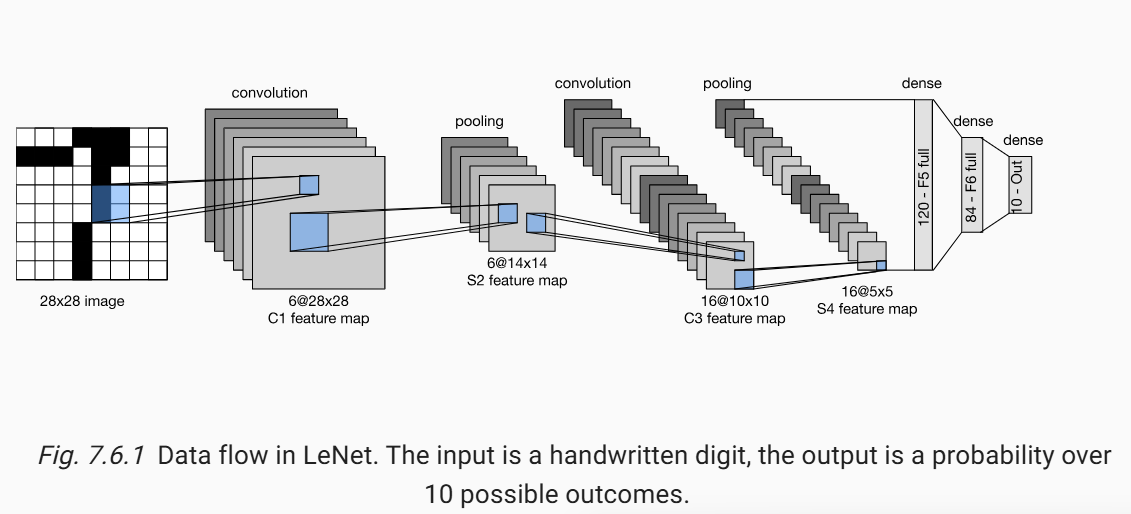

convolutional block:
- each consist of: convolution -> sigmoid activation -> average pooling (model disign use ReLU + max pooling)
- use 5*5 kernels, increase the number of channels. First layer has 6 output channels, second 16 channels.
- each 2*2 pooling with stride 2 downsamples spatial size by a factor of 4
- output shape ofter convolution blocks: batch size, channels, height, width

dense block:
- 4d convolution output is flattened into a 2d matrix: batch size, flattened feature vector
- use 3 fully connected layers with size: 120 -> 84 -> 10
- final layer has 10 outputs (10 classes)
- the block performs the final classification.

In [36]:
def init_cnn(module):  #@save
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

class LeNet(d2l.Classifier):  #@save
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

 Pass a single channel (black and white) 28*28 image through the network and printing the output shape at each layer, we can inspect the model to ensure that its operations line up with what we expect.  
 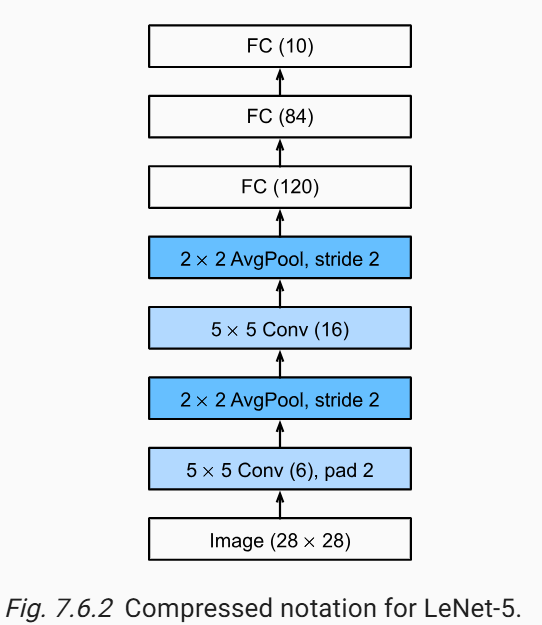


In [37]:
@d2l.add_to_class(d2l.Classifier)  #@save
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


The height and width of the representation through the convolutional block is reduced compared to the previous layer.  
The first convolutional layer use 2 pixels padding to use a 5*5 kernel.  
The second convolutional layer has no padding.    
The number of channels increases layer-over-layer from 1 to 6 after the first and 16 after the second.  
Finally, each fully connected layer reduces dimesionality, emits an output whose dimension matches the number of classes.

### 7.6.2. Training

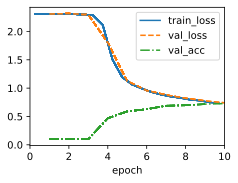

In [39]:
# loss is cross-entropy, minimize it by SGD
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

### 7.6.3. Summary
- compare LeNet-5 with MLPs (5.2) and ResNet (8.6), it is more similar to the latter. The greater amounts of computation enabled significantly more complex architectures.
- LeNet is easier to implement than the past